# Introduction to band ratios

Welcome this notebook serves as a common starting point discussing prerequisites and
resources to get familiar with this frequency band ratio project.

In [1]:
import sys
sys.path.append('../bratios')
from ratios import *#calc_band_ratio
%matplotlib inline
import matplotlib.pyplot as plt
from fooof.sim import *#gen_power_spectrum
from fooof.plts import *
from fooof import FOOOF
from settings import *

import seaborn as sns
sns.set_context('poster')

## Project Overview
This project explores frequency band ratios - a metric used in spectral analysis since at least the 1960's to characterize cognitive functions such as vigilance, aging, memory among other. Band ratios have also been used as a biomarker for diagnosing and monitoring of ADHD, diseases of consciousness, and nervous system disorders such as Parkinson's disease. These notebooks will walkthrough how band ratios are calculated and how they can lead to misestimations and be blatantly wrong. The contents of these notebooks will be laid out as followed:

- Run simulations which varies one parameter of a power spectrum while keeping the other parameters constant. This will characterize the extent to which each parameter influences band ratio measures.

- Run simulations which varies two parameters while keeping the rest constant. This will show how interacting parameters can affect ratio measures.

- Analyze EEG datasets to confirm or reject our findings from the simulation.

In [2]:
# Settings
theta_band = [4, 8]
beta_band = [15, 25]
freq_range = [1, 35]
back_params = [0, 1]
oscs = [6, 0.3, 1, 10, .5, .75, 25, 0.25, 1.5]

## What is a band ratio

Given a power spectrum, a band ratio is the ratio of average power within a band between two frequency ranges. Typically ratios are calculated as 'avg(low band power)' / 'avg(high band power)'

The following cell generates a power spectral density (PSD) and highlights the frequency ranges used to calculate a theta/beta band ratio.

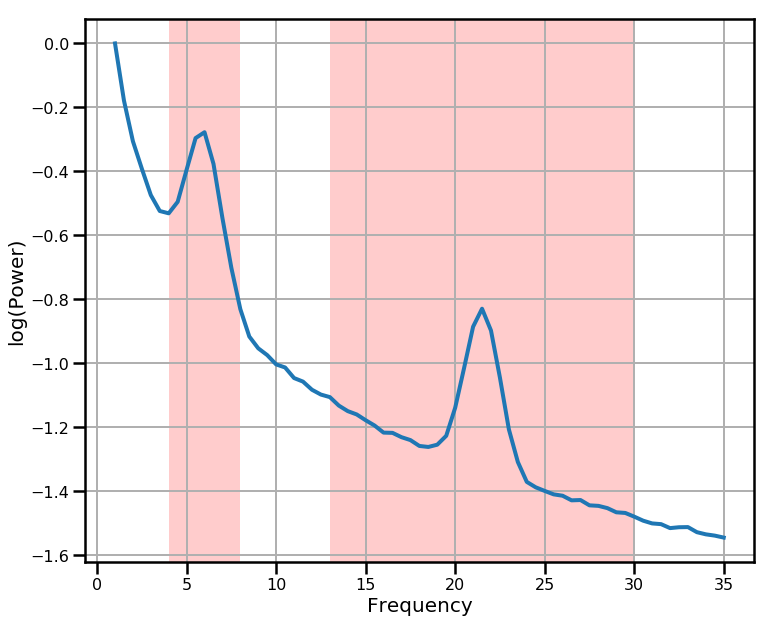

In [9]:
def_bg = [OFF_DEF, EXP_DEF]
def_osc = [CF_LOW_DEF, PW_DEF, BW_DEF, CF_HIGH_DEF, PW_DEF, BW_DEF]
fs, ps = gen_power_spectrum(freq_range, def_bg, def_osc)

fm = FOOOF()
fm.add_data(fs,ps)

fig = plot_spectrum_shading(fs, ps, [[4, 8], [13,30]], log_powers=True, linewidth=4)
plt.savefig("../figures/tbr.png", dpi=300)

# Calculate theta/beta ratios 

### Average Power Ratio

The most cannonical way of calculating band ratios is to take average power in the low-band and divide it by the average power from the high-band. Average power is calculated as the sum of all discrete power values divided by number on power values in that band.

In [10]:
ratio = calc_band_ratio(fs, ps, theta_band, beta_band)
ratio

5.938734350151825

And there you have it - our first computed frequency band ratio!

The following notebooks will demonstrate how the band ratio metric can lead to both systematic mis-etimations and flat out be wrong.